# OptiCoffee

El Área de Producción de **OptiCoffee** lo ha contactado para realizar la **planeación de la producción de toneladas de café para los próximos 12 meses**. El Área de Producción debe decidir **cuántas toneladas de café producir mensualmente** con el fin de **satisfacer la demanda al final de cada mes**.

Actualmente, OptiCoffee cuenta con un **inventario de 100 toneladas** de café almacenadas en su bodega. Al final de cada mes, el café que no haya sido utilizado debe ser **almacenado en inventario** y puede ser utilizado para satisfacer la demanda de los siguientes meses.

La **Tabla 1** presenta los **costos mensuales de producción y almacenamiento** de una tonelada de café, así como la **demanda mensual** de toneladas de café que tiene que satisfacer OptiCoffee. Es importante tener en cuenta que los **costos y la demanda varían dependiendo del mes**.

Naturalmente, el Área de Producción de OptiCoffee desea **minimizar sus costos totales a lo largo del horizonte de planeación** (i.e., 12 meses).



**Tabla 1.** Costos mensuales de producción y almacenamiento de una tonelada de café y demanda mensual

| Mes                                               | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   | 9   | 10  | 11  | 12  |
| ------------------------------------------------- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| **Costo de producción** (millones de COP/Ton)     | 5   | 5   | 5   | 10  | 6   | 10  | 9   | 9   | 6   | 10  | 7   | 8   |
| **Costo de almacenamiento** (millones de COP/Ton) | 5   | 4   | 4   | 5   | 3   | 1   | 3   | 5   | 3   | 3   | 4   | 5   |
| **Demanda** (Ton)                                 | 522 | 554 | 557 | 519 | 476 | 475 | 462 | 452 | 465 | 422 | 512 | 596 |



**Objetivo**

Para planear la producción de OptiCoffee, usted desarrollará un **modelo de optimización**.

## Datos

In [16]:
import time



import sys
import os

sys.path.append(os.path.abspath("../Instances"))

from InsInventory import generar_datos



resultados = []

In [17]:
# Crear entorno con instancia sintética
horizonte_planeacion = generar_datos(num_periodos=50)
I_0 = 5
horizonte_planeacion


,t,Mes,c_t,h_t,d_t,Clasif_c,Clasif_h,Demanda_rel
t,,,,,,,,
1,1,M1,7.98,4.49,4,Medio,Medio,Baja
2,2,M2,7.92,4.53,5,Medio,Medio,Media
3,3,M3,6.51,3.55,3,Medio,Medio,Baja
4,4,M4,4.81,4.79,4,Barato,Medio,Baja
5,5,M5,7.19,3.86,5,Medio,Medio,Media
6,6,M6,7.79,3.18,5,Medio,Medio,Media
7,7,M7,4.39,2.66,5,Barato,Barato,Media
8,8,M8,8.11,5.41,7,Caro,Caro,Alta
9,9,M9,5.32,3.06,5,Barato,Medio,Media


## Optimización (MIP)

### Formulación

#### Conjuntos

$$
M \quad \text{: Conjunto de meses}
$$

#### Parámetros

$$
c_t \quad \text{: Costo de producir una tonelada de café en el mes } t \in M
$$

$$
h_t \quad \text{: Costo de almacenar una tonelada de café en el mes } t \in M
$$

$$
d_t \quad \text{: Demanda de café en el mes } t \in M
$$

$$
I^0 \quad \text{: Inventario inicial (toneladas)}
$$


#### Variables de decisión

$$
x_t \quad \text{: Toneladas de café a producir en el mes } t \in M
$$

$$
I_t \quad \text{: Inventario de toneladas de café al final del mes } t \in M
$$


#### Modelo en Palabras

**Minimizar:**

> Costos de producción + Costos de almacenamiento

**Sujeto a:**

* Modelar el inventario para el primer mes
* Modelar el inventario para los demás meses
* Naturaleza de las variables

#### Modelo Matemático

Minimizar:

$$
\sum_{t \in M} (c_t x_t + h_t I_t) \tag{1}
$$

Sujeto a:

Inventario en el primer mes:

$$
I_1 = I^0 + x_1 - d_1 \tag{2}
$$

Inventario para los meses siguientes:

$$
I_t = I_{t-1} + x_t - d_t, \quad \forall t \in M \mid t > 1 \tag{3}
$$

Naturaleza de las variables:

$$
x_t, I_t \geq 0, \quad \forall t \in M \tag{4}
$$

#### Notas

* (1) minimiza los costos de producción más los costos de almacenamiento.
* (2) modela el inventario para el primer mes.
* (3) modela el inventario para los demás meses.
* (4) describe la naturaleza de las variables.


In [18]:
M = list(horizonte_planeacion.index)
c = dict(horizonte_planeacion['c_t'].squeeze())
h = dict(horizonte_planeacion['h_t'].squeeze())
d = dict(horizonte_planeacion['d_t'].squeeze())

In [19]:
import pulp as lp

def optimizacion_inventario(M, c, h, d, I_0 = 0):

    model = lp.LpProblem("OptiCoffi", lp.LpMinimize)

    x = {t: lp.LpVariable(f'x_{t}', lowBound=0, cat=lp.LpInteger) for t in M}
    I = {t: lp.LpVariable(f'I_{t}', lowBound=0, cat=lp.LpInteger) for t in M}
    
    model += lp.lpSum(c[t] * x[t] + h[t] * I[t] for t in M)

    for t in M:
        if t == 1:
            model += I[1] == I_0 + x[1] - d[1]
        else:
            model += I[t] == I[t-1] + x[t] - d[t]
    
    solver = lp.getSolver('PULP_CBC_CMD', msg=False)
    model.solve(solver)

    print(f'El optimizador llegó a una solución: {lp.LpStatus[model.status]}.')

    return model, x, I

In [20]:
t0 = time.perf_counter()

model, x, I = optimizacion_inventario(M, c, h, d, I_0)

elapsed = time.perf_counter() - t0
print(f"\nTiempo de ejecución: {elapsed:.6f} s")


obj_lp = round(lp.value(model.objective), 3)

produccion = {t: x[t].varValue for t in M}
inventario = {1: I_0, **{t+1: I[t].varValue for t in M}}

cost_produccion = round(sum([x[t].varValue * c[t] for t in M]), 3)
cost_inventario = round(sum([I[t].varValue * h[t] for t in M]), 3)


print(f'FO (valor total): {cost_produccion} (Producción) + {cost_inventario} (Inventario) = {obj_lp}')
print(f'Cantidad de toneladas pedidas (valor total): {sum(produccion.values())}.')
print(f'Cantidad de toneladas en inventario (valor total): {sum(inventario.values())}.')

resultados.append({
    "Método"             : "LP",
    "Costo Total"        : obj_lp,
    "Costo producir"     : cost_produccion,
    "Costo inventario"   : cost_inventario,
    "Ton pedidas (total)": sum(produccion.values()),
    "Inventario(total)"  : sum(inventario.values()),
    "Tiempo (s)"         : elapsed
})

El optimizador llegó a una solución: Optimal.

Tiempo de ejecución: 0.034241 s
FO (valor total): 1478.57 (Producción) + 101.42 (Inventario) = 1579.99
Cantidad de toneladas pedidas (valor total): 239.0.
Cantidad de toneladas en inventario (valor total): 46.0.


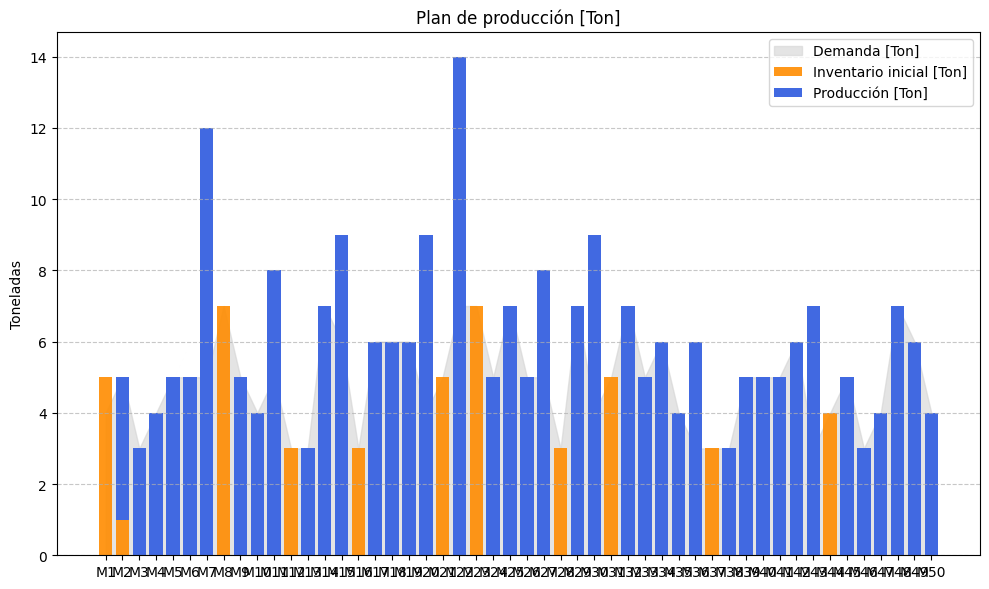

In [21]:
import matplotlib.pyplot as plt

if len(M) <= 12:
    meses = ['ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC']
else:
    meses = [f"M{i}" for i in M]

# Extraer datos en listas
demanda_list = [d[t] for t in M]
produccion_list = [produccion[t] for t in M]
inventario_list = [inventario[t] for t in M]

# Graficar correctamente con barras apiladas
plt.figure(figsize=(10, 6))

# Área de la demanda
plt.fill_between(meses, demanda_list, color='lightgray', label='Demanda [Ton]', alpha=0.6)

# Barras apiladas: producción sobre inventario inicial
plt.bar(meses, inventario_list, label='Inventario inicial [Ton]', color='darkorange', alpha=0.9)
plt.bar(meses, produccion_list, bottom=inventario_list, label='Producción [Ton]', color='royalblue')

plt.title('Plan de producción [Ton]')
plt.ylabel('Toneladas')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Programación Dinámica

### Algoritmos de Solución

In [22]:
sys.path.append(os.path.abspath("../DP/Env"))
sys.path.append(os.path.abspath("../DP/Algorithms/"))
sys.path.append(os.path.abspath("../DP/Visual/"))

from Inventory import InventoryEnv

from value_iteration import value_iteration
from policy_evaluation import policy_evaluation
from policy_iteration import policy_iteration

from value_states import value_states_visual
from policy_dag import draw_policy_dag

#### Datos

In [23]:
# 1. Definimos la demanda determinística para n períodos
demand = list(d.values())
cost_producir = list(c.values())
cost_almacenar = list(h.values())

# 2. Fijamos los parámetros del almacén
capacity         = int(sum(demand)/2)
start_inventory  = I_0


env = InventoryEnv(demand, cost_producir, cost_almacenar, capacity, start_inventory)
print(env)

InventoryEnv(Horizonte = 50, Capacidad = 122, #_Estados = 6273)


#### Policy Evaluation


Tiempo de ejecución: 0.178582 s
FO (valor total): 1639.52 (Producción) + 4.49 (Inventario) = 1644.01
Cantidad de toneladas pedidas (valor total): 239.
Cantidad de toneladas en inventario (valor total): 6.


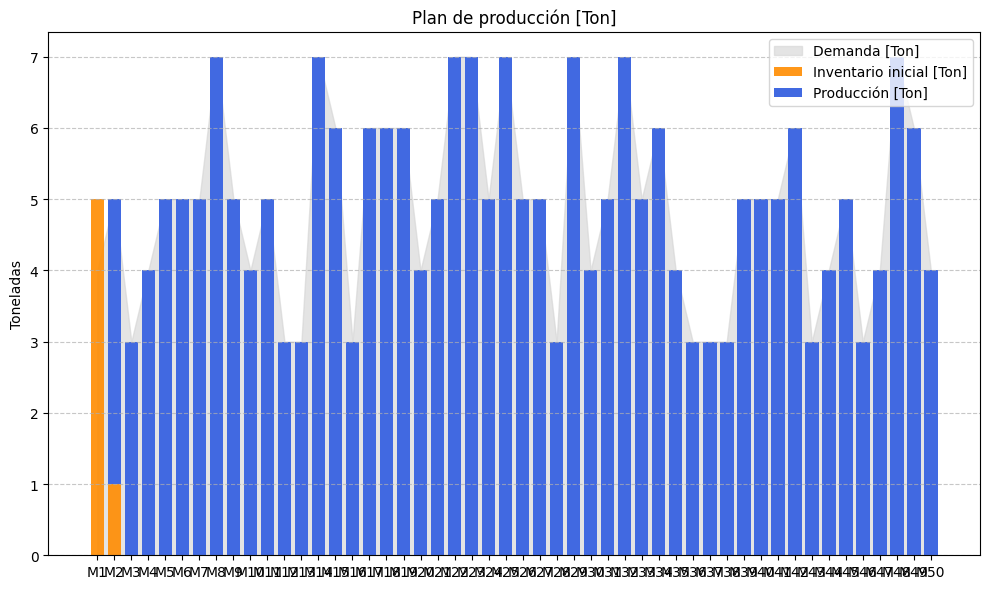

In [24]:
# Politica

propose_policy = { (t, S): max(0, env.demand[t] - S)
           for t in range(env.n)
           for S in range(env.capacity + 1) }

policy = propose_policy.copy()



t0 = time.perf_counter()

# ▸ Evaluación de la política determinista 'propose_policy'
V = policy_evaluation(env, propose_policy)

elapsed = time.perf_counter() - t0
print(f"\nTiempo de ejecución: {elapsed:.6f} s")

obj_lp, costos_prod, costos_inv, produccion, inventario, trayecto = env.report_from_policy(policy)

resultados.append({
    "Método"             : "Policy evaluation",
    "Costo Total"        : obj_lp,
    "Costo producir"     : sum(costos_prod),
    "Costo inventario"   : sum(costos_inv),
    "Ton pedidas (total)": sum(produccion),
    "Inventario(total)"  : sum(inventario),
    "Tiempo (s)"         : elapsed
})

#### Policy Iteration


Tiempo de ejecución: 0.788748 s
FO (valor total): 1478.57 (Producción) + 101.42 (Inventario) = 1579.99
Cantidad de toneladas pedidas (valor total): 239.
Cantidad de toneladas en inventario (valor total): 46.


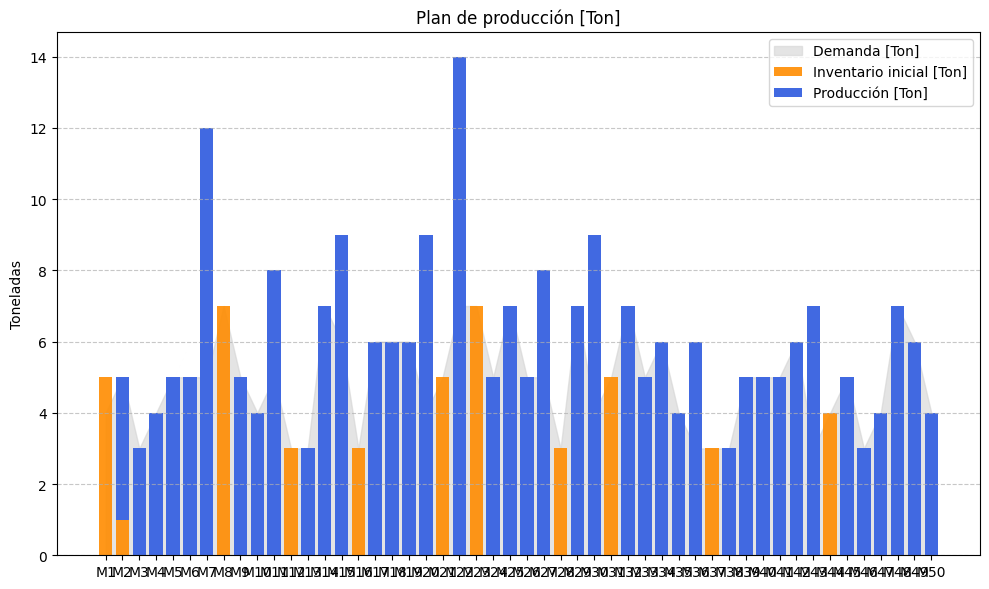

In [25]:
t0 = time.perf_counter()

star_policy, V_star = policy_iteration(env, policy)

elapsed = time.perf_counter() - t0
print(f"\nTiempo de ejecución: {elapsed:.6f} s")

obj_lp, costos_prod, costos_inv, produccion, inventario, trayecto = env.report_from_policy(star_policy)

resultados.append({
    "Método"             : "Policy iteration",
    "Costo Total"        : obj_lp,
    "Costo producir"     : sum(costos_prod),
    "Costo inventario"   : sum(costos_inv),
    "Ton pedidas (total)": sum(produccion),
    "Inventario(total)"  : sum(inventario),
    "Tiempo (s)"         : elapsed
})

#### Value Iteration


Tiempo de ejecución: 22.738377 s
FO (valor total): 1478.57 (Producción) + 101.42 (Inventario) = 1579.99
Cantidad de toneladas pedidas (valor total): 239.
Cantidad de toneladas en inventario (valor total): 46.


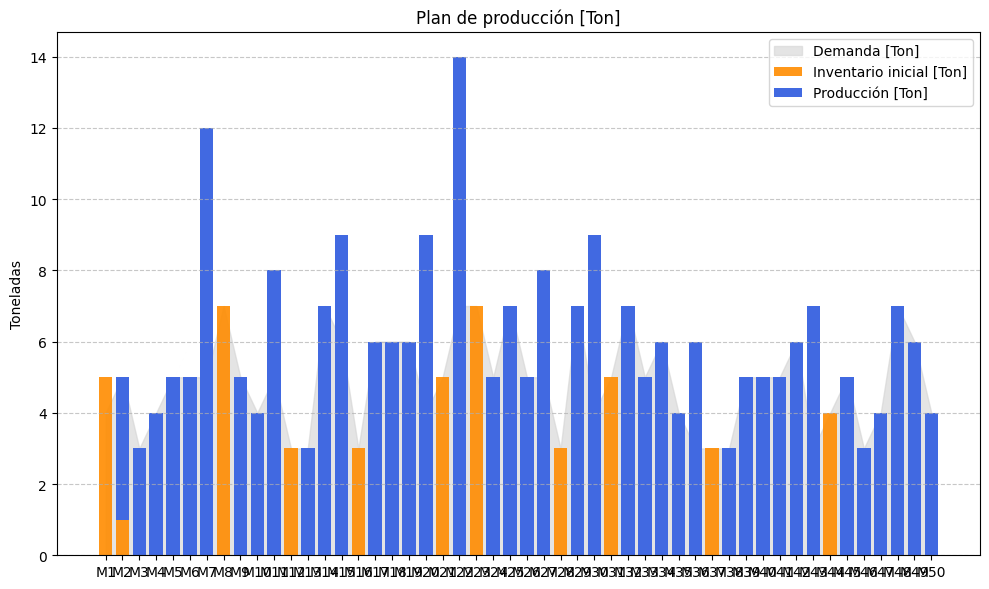

In [26]:
t0 = time.perf_counter()


opt_policy, V_opt = value_iteration(env)

elapsed = time.perf_counter() - t0
print(f"\nTiempo de ejecución: {elapsed:.6f} s")

obj_lp, costos_prod, costos_inv, produccion, inventario, trayecto = env.report_from_policy(opt_policy)

resultados.append({
    "Método"             : "Value iteration",
    "Costo Total"        : obj_lp,
    "Costo producir"     : sum(costos_prod),
    "Costo inventario"   : sum(costos_inv),
    "Ton pedidas (total)": sum(produccion),
    "Inventario(total)"  : sum(inventario),
    "Tiempo (s)"         : elapsed
})

### Visualización

#### Value Functions

In [27]:
# ============================================================================
# Visualización condicional de V(s) para cada método aplicado
# ============================================================================
# Se muestran mapas de calor solo si el número de ítems (env.n) es razonable.
# Esto evita congestión visual en instancias grandes.
# ============================================================================

if env.capacity <= 15:

    # ----------------------------------------------------------------------
    # Evaluación de política heurística
    # ----------------------------------------------------------------------
    print("Policy Evaluation")
    value_states_visual(env, V, propose_policy)
    print()

    # ----------------------------------------------------------------------
    # Política óptima vía iteración de políticas
    # ----------------------------------------------------------------------
    print("Policy Iteration")
    value_states_visual(env, V_star, star_policy)
    print()

    # ----------------------------------------------------------------------
    # Política óptima vía iteración de valores
    # ----------------------------------------------------------------------
    print("Value Iteration")
    value_states_visual(env, V_opt, opt_policy)
    print()

else:
    print("Para visualizar, use una instancia más pequeña.")


Para visualizar, use una instancia más pequeña.


#### Policy

In [28]:
# ============================================================================
# Visualización condicional del DAG de decisiones para cada política evaluada
# ============================================================================
# Dibuja el grafo dirigido de estados con la trayectoria tomada por:
#   • Política heurística
#   • Iteración de políticas
#   • Iteración de valores
# Solo se activa para instancias pequeñas (n ≤ 20).
# ============================================================================

if env.capacity <= 15:

    # ----------------------------------------------------------------------
    # Política heurística: tomar cuando sea legal
    # ----------------------------------------------------------------------
    print("Policy Evaluation")
    draw_policy_dag(env, propose_policy, initial_state=(0, env.start_inventory))
    print()

    # ----------------------------------------------------------------------
    # Política óptima vía iteración de políticas
    # ----------------------------------------------------------------------
    print("Policy Iteration")
    draw_policy_dag(env, star_policy, initial_state=(0, env.start_inventory))
    print()

    # ----------------------------------------------------------------------
    # Política óptima vía iteración de valores
    # ----------------------------------------------------------------------
    print("Value Iteration")
    draw_policy_dag(env, opt_policy, initial_state=(0, env.start_inventory))
    print()

else:
    print("Para visualizar, use una instancia más pequeña.")


Para visualizar, use una instancia más pequeña.


## Heurísticas

## Resultados

In [29]:
import pandas as pd

# -- Crear DataFrame desde la lista de resultados --
df_resultados = pd.DataFrame(resultados)

# -- Establecer 'Método' como índice --
df_resultados.set_index("Método", inplace=True)

# -- Ordenar por empleos generados (de mayor a menor) --
df_resultados.sort_values("Costo Total", ascending=True, inplace=True)

# -- Visualizar resultados ordenados --
df_resultados

,Costo Total,Costo producir,Costo inventario,Ton pedidas (total),Inventario(total),Tiempo (s)
Método,,,,,,
LP,1579.99,1478.57,101.42,239.0,46.0,0.034241
Policy iteration,1579.99,1478.57,101.42,239.0,46.0,0.788748
Value iteration,1579.99,1478.57,101.42,239.0,46.0,22.738377
Policy evaluation,1644.01,1639.52,4.49,239.0,6.0,0.178582


In [30]:
# -- Tomar la solución base de referencia (LP) --
base_lp = df_resultados.loc["LP"]

# -- Calcular el GAP porcentual relativo al método LP (excepto para Tiempo) --
gap_df = ((df_resultados - base_lp) / base_lp) * 100

# -- Reemplazar la columna de tiempo con "x veces LP" en lugar de porcentaje --
tiempo_ratio = (df_resultados["Tiempo (s)"] / base_lp["Tiempo (s)"]).round(4)

# -- Redondear GAPs a 3 decimales --
gap_df = gap_df.round(3)

# -- Renombrar columnas GAP --
gap_df.columns = [col + " GAP (%)" for col in gap_df.columns]

# -- Reemplazar columna de tiempo con "x veces LP" --
gap_df["Tiempo (s) (x veces LP)"] = tiempo_ratio

# -- Eliminar columna anterior de GAP de tiempo --
gap_df = gap_df.drop(columns=["Tiempo (s) GAP (%)"])

# -- Mostrar tabla --
gap_df

,Costo Total GAP (%),Costo producir GAP (%),Costo inventario GAP (%),Ton pedidas (total) GAP (%),Inventario(total) GAP (%),Tiempo (s) (x veces LP)
Método,,,,,,
LP,0.000,0.000,0.000,0.0,0.000,1.0000
Policy iteration,0.000,0.000,0.000,0.0,0.000,23.0353
Value iteration,0.000,0.000,0.000,0.0,0.000,664.0711
Policy evaluation,4.052,10.886,-95.573,0.0,-86.957,5.2155
